In [52]:
import numpy as np
import pymssql
import pandas as pd

In [194]:
DBConnection = pymssql.connect(user="LSST-2", password="L$$TUser", database="LSSTCATSIM", port='51433')

In [195]:
db = DBConnection.cursor()

In [199]:
def get_colnames(db, tableName, colNamePos=3, colList=range(7)):
    """
    return the colNames in the table by reading the schema.
    
    Parameters
    ----------
    db : database Connection cursor, mandatory
        cursor opened to the database in which the table is located
    tableName : string, mandatory
        Name of the table,
    colNamePos : integer, optional, defaults to 3
        The hierarchy of cols
    colList : List of integers, optional, defaults to range(7)
        indexes corresponding to the desired columns
    """
    query = """select * from information_schema.columns where table_name = '{0}'""".format(tableName)
    db.execute(query)
    x = db.fetchall()
    x = np.array([xx[colNamePos] for xx in x])
    
    if colList is None:
        return x
    return x[colList]

def get_table(db, tableName, colnames=None, index='id'):
    """
    
    """
    if colnames is None:
        colNames = get_colnames(db, tableName)
    
    cols = ", ".join(colnames)
    query = """SELECT {0} FROM [LSSTCATSIM].[dbo].[{1}]""".format(cols, tableName)
    db.execute(query)
    x = db.fetchall()
    df = pd.DataFrame.from_records(x, columns=colnames, index=index)
    return df

In [201]:
get_colnames(db, 'galaxy', colList=None)

array([u'htmid', u'galid', u'ra', u'dec', u'redshift', u'rad_vel', u'u_ab',
       u'g_ab', u'r_ab', u'i_ab', u'z_ab', u'y_ab', u'sedid_bulge',
       u'sedid_disk', u'sedid_agn', u'av_b', u'rv_b', u'ext_model_b',
       u'av_d', u'rv_d', u'ext_model_d', u'glon', u'glat', u'pa_bulge',
       u'pa_disk', u'inc_bulge_deg', u'inc_disk_deg', u'a_b', u'b_b',
       u'bulge_n', u'bra', u'bdec', u'a_d', u'b_d', u'disk_n', u'dra',
       u'ddec', u'agnra', u'agndec', u'versionid', u'fluxnorm_bulge',
       u'fluxnorm_agn', u'absmag_r_total', u'gal_type', u'mass_stellar',
       u'mass_gas', u'mass_halo', u'ug_total_rest', u'gr_total_rest',
       u'ri_total_rest', u'iz_total_rest', u'zy_total_rest', u'isagn',
       u'agn_tau', u'agn_sfu', u'agn_sfg', u'agn_sfr', u'agn_sfi',
       u'agn_sfz', u'agn_sfy', u'fluxnorm_disk', u'magnorm_bulge',
       u'magnorm_disk', u'magnorm_agn', u'cx', u'cy', u'cz', u'geopoint',
       u'sedname_agn', u'sedname_bulge', u'sedname_disk', u'varsimobjid',
       

In [82]:
galTiles = get_table(db, 'tiles', colnames=x)#.apply(np.radians)

In [83]:
galTiles.query('abs(ramid - 53.009) < 5 and abs(decmid + 27.439) < 5 ')

,llx,lly,urx,ury,ramid,decmid
id,,,,,,
554,48,-34,52,-30,50,-32
555,48,-30,52,-26,50,-28
556,48,-26,52,-22,50,-24
599,52,-34,56,-30,54,-32
600,52,-30,56,-26,54,-28
601,52,-26,56,-22,54,-24
644,56,-34,60,-30,58,-32
645,56,-30,60,-26,58,-28
646,56,-26,60,-22,58,-24


In [85]:
def galTileArea(galTiles, id):
    TwinklesObsMetaData = ObservationMetaData(boundType='box',pointingRA=centralRA,pointingDec=centralDec,
                                              boundLength=patchRadius, mjd=49540.0)
    

In [88]:
galTiles.ramid.describe()

count    4050.000000
mean      180.000000
std       103.929465
min         2.000000
25%        90.000000
50%       180.000000
75%       270.000000
max       358.000000
Name: ramid, dtype: float64

In [90]:
delta = np.radians(2)

In [108]:
galTiles['decMidRad'] = np.radians( -galTiles['decmid'] + 90.)

In [112]:
galTiles['area'] = 2* delta * np.sin(delta) * np.sin(galTiles.decMidRad)

In [113]:
galTiles

,llx,lly,urx,ury,ramid,decmid,area,decMidRad
id,,,,,,,,
0,0,-90,4,-86,2,-88,0.000085,3.106686
1,0,-86,4,-82,2,-84,0.000255,3.036873
2,0,-82,4,-78,2,-80,0.000423,2.967060
3,0,-78,4,-74,2,-76,0.000589,2.897247
4,0,-74,4,-70,2,-72,0.000753,2.827433
5,0,-70,4,-66,2,-68,0.000913,2.757620
6,0,-66,4,-62,2,-64,0.001068,2.687807
7,0,-62,4,-58,2,-60,0.001218,2.617994
8,0,-58,4,-54,2,-56,0.001362,2.548181


In [97]:
%matplotlib inline
import matplotlib.pyplot as plt

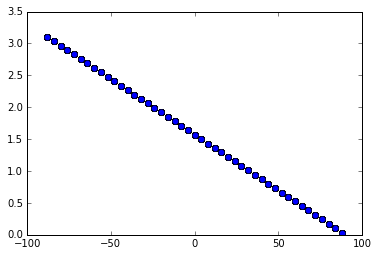

In [110]:
plt.plot(galTiles.decmid, galTiles.decMidRad, 'o')

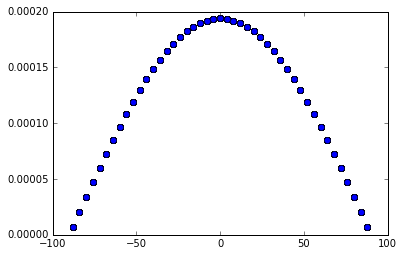

In [115]:
plt.plot(galTiles.decmid, galTiles.area/np.pi /4., 'o')

In [103]:
np.radians(2)

0.034906585039886591

In [84]:
from lsst.sims.utils import ObservationMetaData

In [155]:
galTiles.query('abs(ramid-53) < 5 and abs(decmid+27.4) < 5')

,llx,lly,urx,ury,ramid,decmid,area,decMidRad
id,,,,,,,,
554,48,-34,52,-30,50,-32,0.002066,2.129302
555,48,-30,52,-26,50,-28,0.002151,2.059489
556,48,-26,52,-22,50,-24,0.002226,1.989675
599,52,-34,56,-30,54,-32,0.002066,2.129302
600,52,-30,56,-26,54,-28,0.002151,2.059489
601,52,-26,56,-22,54,-24,0.002226,1.989675


In [160]:
def tileObsMetaData(id, galTileDF):
    """
    """
    ra = galTiles.ix[id, 'ramid']
    dec = galTiles.ix[id, 'decmid']
    obsMetaData = ObservationMetaData(boundType='box',
                                      pointingRA=ra,
                                      pointingDec=dec,
                                      boundLength=2.)
    return obsMetaData
    

In [ ]:
ObservationMetaData()


In [161]:
obsMeta = tileObsMetaData(600, galTiles)

In [ ]:
from lsst.sims.catUtils.

In [163]:
from lsst.sims.catalogs.measures.instance import InstanceCatalog
import lsst.sims.catUtils.baseCatalogModels as bcm
from lsst.sims.catalogs.generation.db import CatalogDBObject
from lsst.sims.catUtils.baseCatalogModels.GalaxyModels import GalaxyTileObj

/Users/rbiswas/src/LSST/sims_catalogs_generation/python/lsst/sims/catalogs/generation/db/dbConnection.py:438: UserWarning: Duplicate object type id 25 specified: 
Output object ids may not be unique.
This may not be a problem if you do not want globally unique id values
  'want globally unique id values')
/Users/rbiswas/src/LSST/sims_catalogs_generation/python/lsst/sims/catalogs/generation/db/dbConnection.py:438: UserWarning: Duplicate object type id 40 specified: 
Output object ids may not be unique.
This may not be a problem if you do not want globally unique id values
  'want globally unique id values')


In [165]:
galaxyTiled  = GalaxyTileObj()

/usr/local/manual/anaconda/lib/python2.7/site-packages/sqlalchemy/dialects/mssql/base.py:1294: SAWarning: Did not recognize type 'geography' of column 'geopoint'
  return fn(*arg, **kw)


In [166]:
class galCopy(InstanceCatalog):
    column_outputs = ['galtileid', 'raJ2000', 'decJ2000', 'redshift', 'a_d', 'b_d', 'pa_disk']
    override_formats = {'raJ2000': '%8e', 'decJ2000': '%8e', 'a_d': '%8e', 'b_d': '%8e', 'pa_disk': '%8e'}

In [168]:
TwinklesGalaxies = galCopy(galaxyTiled, obs_metadata=obsMeta, constraint='mass_stellar')

In [191]:
import time

In [192]:
tstart = time.time()
TwinklesGalaxies.write_catalog('TwinkGals.dat')
tend = time.time()
print(tend - tstart)

734.053437948


In [193]:
!wc -l TwinkGals.dat 

 12148154 TwinkGals.dat


In [172]:
12148154 / 1e6

12.148154

In [189]:
query = """SELECT galtileid, raJ2000, decJ2000, redshift, a_d, b_d, pa_disk  FROM [LSSTCATSIM].[dbo].[galaxy]"""

In [184]:
query = """SELECT count(*)  FROM [LSSTCATSIM].[dbo].[galaxyBase]"""

In [186]:
query = """SELECT table_name FROM information_schema.tables"""

In [190]:
db.execute(query)

ProgrammingError: (207, "Invalid column name 'galtileid'.DB-Lib error message 20018, severity 16:\nGeneral SQL Server error: Check messages from the SQL Server\nDB-Lib error message 20018, severity 16:\nGeneral SQL Server error: Check messages from the SQL Server\nDB-Lib error message 20018, severity 16:\nGeneral SQL Server error: Check messages from the SQL Server\n")

In [188]:
db.fetchall()

[(u'StarMLT',),
 (u'StarMLTForceseek',),
 (u'galaxy_agn',),
 (u'StarAllForceseek',),
 (u'galaxy_bulge',),
 (u'StarAll',),
 (u'StarMSRGB',),
 (u'StarMSRGBForceseek',),
 (u'StarDwarfGalaxy',),
 (u'stars_mlt_part_1180',),
 (u'tiles',),
 (u'docColumnDescriptions',),
 (u'TwinkSN',),
 (u'galaxy_disk',),
 (u'stars_mlt_part_1220',),
 (u'docItems',),
 (u'SNStaging',),
 (u'stars_obafgk_part_1220',),
 (u'SNKrakenStaging',),
 (u'TwinkSNKraken',),
 (u'starsCenteredp80m10',),
 (u'density_map_pivot_starsMSRGB',),
 (u'ra_center_map_pivot_starsMSRGB',),
 (u'output_opsim3_61',),
 (u'decl_center_map_pivot_starsMSRGB',),
 (u'mltNameTable',),
 (u'MLTlookup',),
 (u'stars_partition_8700000000000_circle80m10',),
 (u'stars_mlt_part_1250',),
 (u'starsMSRGBp80m10',),
 (u'stars_obafgk_part_1250',),
 (u'gizisNameTable',),
 (u'starsMSRGBp80m10_forceseek',),
 (u'MLTfitTestTable',),
 (u'easterEggsFit',),
 (u'density_map_pivot_starsWD',),
 (u'sfdAstromEasterEggs',),
 (u'decl_center_map_pivot_starsWD',),
 (u'ra_center_

In [159]:
print(obsMeta.boundLength)

2.0


In [86]:
obsMetaData = ObservationMetaData(boundType='box',pointingRA=,pointingDec=centralDec,
                                              boundLength=2, mjd=49540.0)
    

NameError: name 'centralRA' is not defined

In [78]:
map(np.degrees, (0.925184, -0.4789))

[53.009138473031555, -27.438948808815123]

In [59]:
x = get_colnames(db, 'tiles', colList=range(7))

In [48]:
type(x)

numpy.ndarray

In [60]:
x

array([u'id', u'llx', u'lly', u'urx', u'ury', u'ramid', u'decmid'], 
      dtype='<U10')

In [ ]:
def get_table(db, colnames):
    """SELECT TOP 10 id, llx, lly, urx, ury, ramid, decmid  FROM [LSSTCATSIM].[dbo].[tiles]"""
    

In [177]:
query = """SELECT TOP 10 id, llx, lly, urx, ury, ramid, decmid  FROM [LSSTCATSIM].[dbo].[tiles]"""

In [178]:
db.execute(query)

In [179]:
db.fetchall()

[(0, 0.0, -90.0, 4.0, -86.0, 2.0, -88.0),
 (1, 0.0, -86.0, 4.0, -82.0, 2.0, -84.0),
 (2, 0.0, -82.0, 4.0, -78.0, 2.0, -80.0),
 (3, 0.0, -78.0, 4.0, -74.0, 2.0, -76.0),
 (4, 0.0, -74.0, 4.0, -70.0, 2.0, -72.0),
 (5, 0.0, -70.0, 4.0, -66.0, 2.0, -68.0),
 (6, 0.0, -66.0, 4.0, -62.0, 2.0, -64.0),
 (7, 0.0, -62.0, 4.0, -58.0, 2.0, -60.0),
 (8, 0.0, -58.0, 4.0, -54.0, 2.0, -56.0),
 (9, 0.0, -54.0, 4.0, -50.0, 2.0, -52.0)]

In [ ]:
query  = """SELECT t.name AS table_name FROM """

In [22]:
query = """SELECT t.COLUMNS from tiles as t"""

In [24]:
query = """select * from information_schema.columns where table_name = 'tiles'"""

In [25]:
db.execute(query)

In [26]:
db.fetchall()

[(u'LSSTCATSIM',
  u'dbo',
  u'tiles',
  u'id',
  1,
  None,
  u'YES',
  u'int',
  None,
  None,
  10,
  10,
  0,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None),
 (u'LSSTCATSIM',
  u'dbo',
  u'tiles',
  u'llx',
  2,
  None,
  u'YES',
  u'float',
  None,
  None,
  53,
  2,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None),
 (u'LSSTCATSIM',
  u'dbo',
  u'tiles',
  u'lly',
  3,
  None,
  u'YES',
  u'float',
  None,
  None,
  53,
  2,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None),
 (u'LSSTCATSIM',
  u'dbo',
  u'tiles',
  u'urx',
  4,
  None,
  u'YES',
  u'float',
  None,
  None,
  53,
  2,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None),
 (u'LSSTCATSIM',
  u'dbo',
  u'tiles',
  u'ury',
  5,
  None,
  u'YES',
  u'float',
  None,
  None,
  53,
  2,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None),
 (u'L

In [116]:
import joblib

In [133]:
%%timeit 
joblib.dump(galTiles, 'galTile')
gg = joblib.load('galTile')

100 loops, best of 3: 5.84 ms per loop


In [137]:
import cPickle as pickle

In [140]:
%%timeit 
gT = pickle.pickle
#gg = pickle.loads('galTile')

10 loops, best of 3: 22.2 ms per loop


TypeError: an integer is required